# Setup

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
lunghezza_riferimento = 30000 #nm
percentuale = 15.87 #%  #quantita' percentuale della gaussiana delle profondita' che stiamo lasciando fuori nella valutazione della media

#1 sigma = 15.87%, 2 sigma = 2.28%, 3 sigma = 0.14%

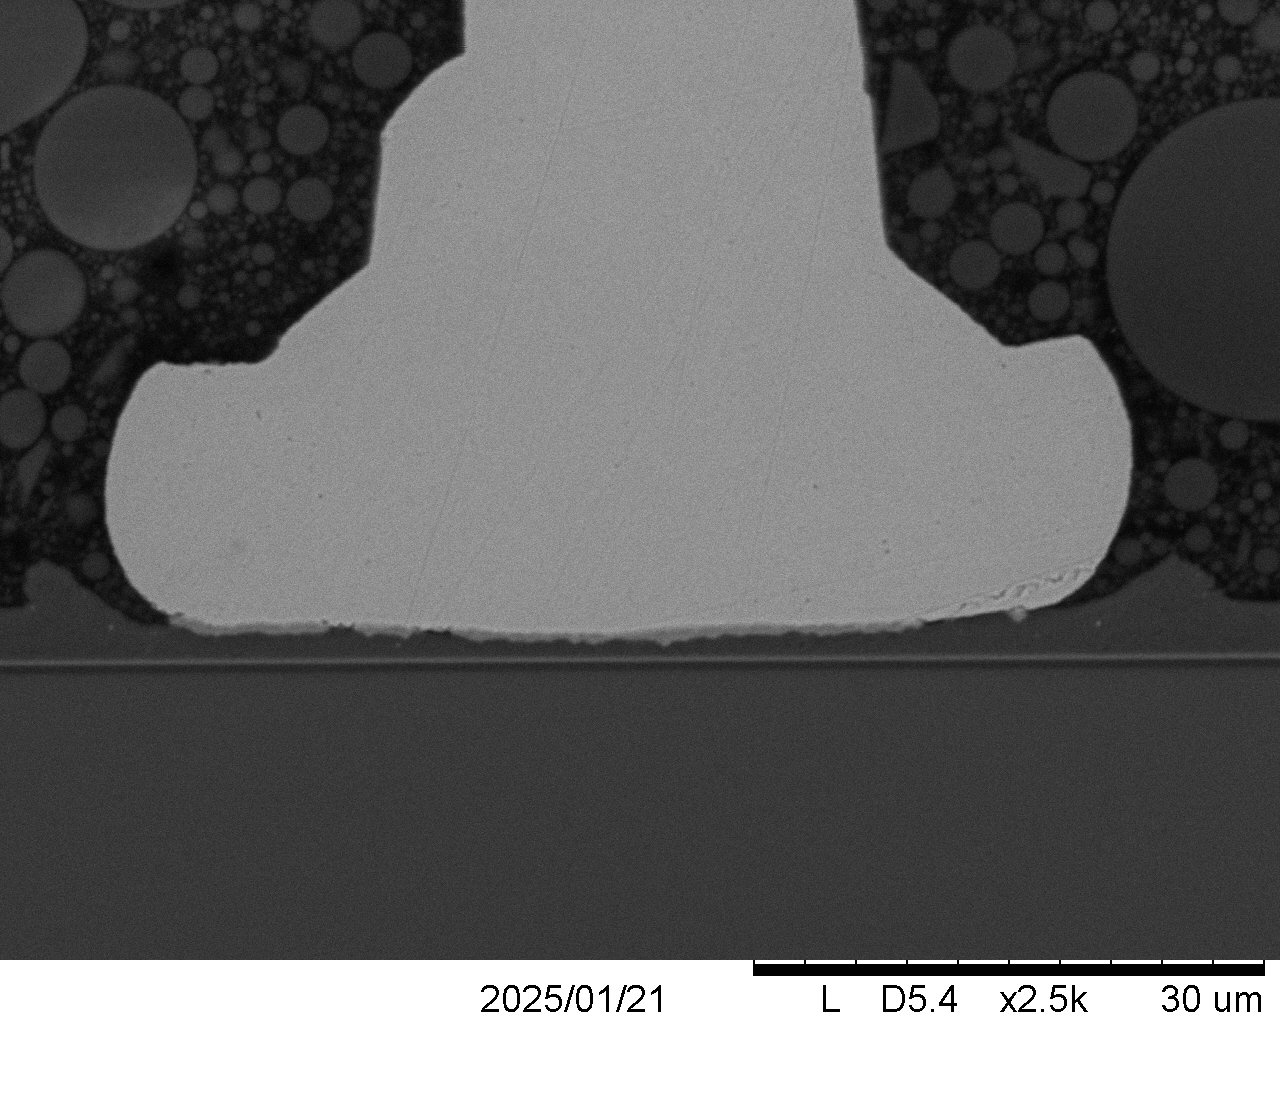

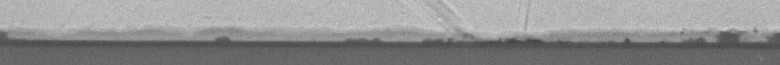

(1100, 1280, 3)
(65, 780, 3)


In [ ]:
#Carico l'immagine da analizzare ed il "needle" che usero' per la scanzione convolutiva per l'image recognition

SEMimage = cv2.imread('3BH 5000h ball40.jpg' , cv2.IMREAD_UNCHANGED)
needle = cv2.imread('needle.jpg' , cv2.IMREAD_UNCHANGED)

#Stampo le immagini

cv2_imshow(SEMimage)
cv2_imshow(needle)
print(SEMimage.shape)
print(needle.shape)

# Divido l'immagine dalla parte di lenght reference

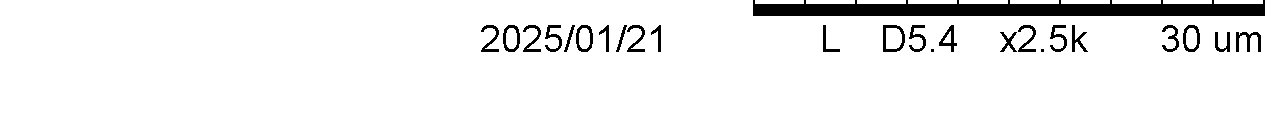

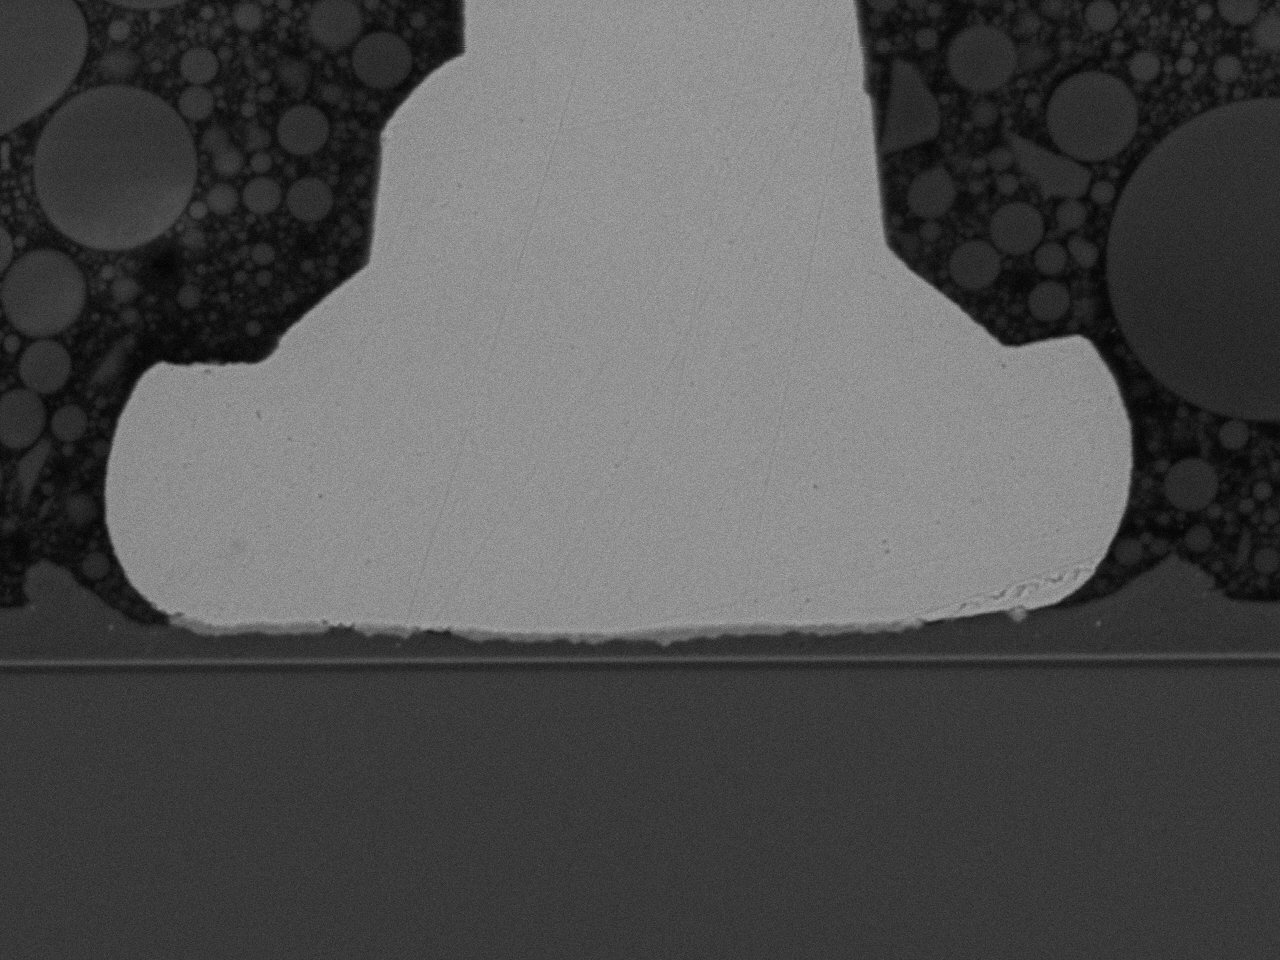

In [ ]:
#Divido l'immagine SEM in due immagini differenti, una che sara' usata per l'analisi e l'altra per trovare la lunghezza fisica per pixel

for i in range(SEMimage.shape[0]):
  if np.all(SEMimage[i][0] == 255):
    end = i
    break

image = SEMimage[:end, :]
lenght_image = SEMimage[end:, :]

cv2_imshow(lenght_image)
cv2_imshow(image)

# Algoritmo di ricerca

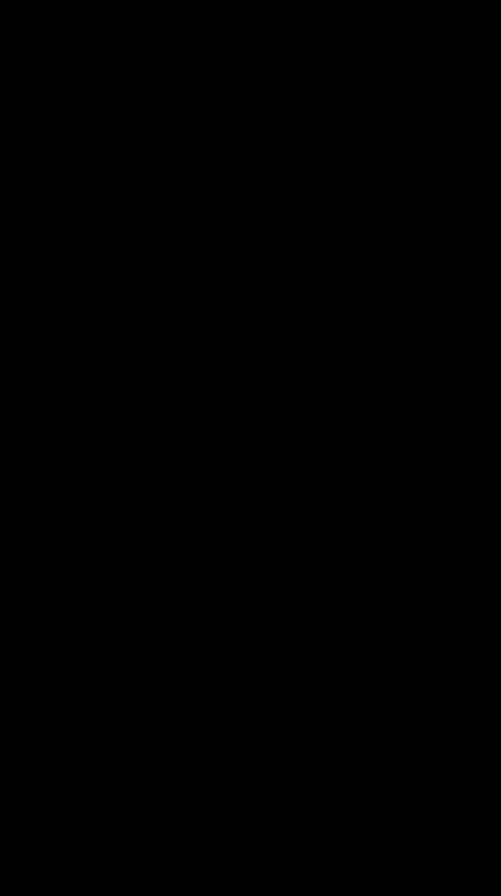

(896, 501)
0.905699610710144 (168, 595)


In [ ]:
#Applico l'algoritmo di ricerca convolutiva e trovo il pixel che piu' assomiglia al needle utilizzato

result = cv2.matchTemplate(image , needle , cv2.TM_CCOEFF_NORMED)
min_value, Max_value, min_loc, Max_loc = cv2.minMaxLoc(result)

cv2_imshow(result)
print(result.shape)
print(Max_value, Max_loc)

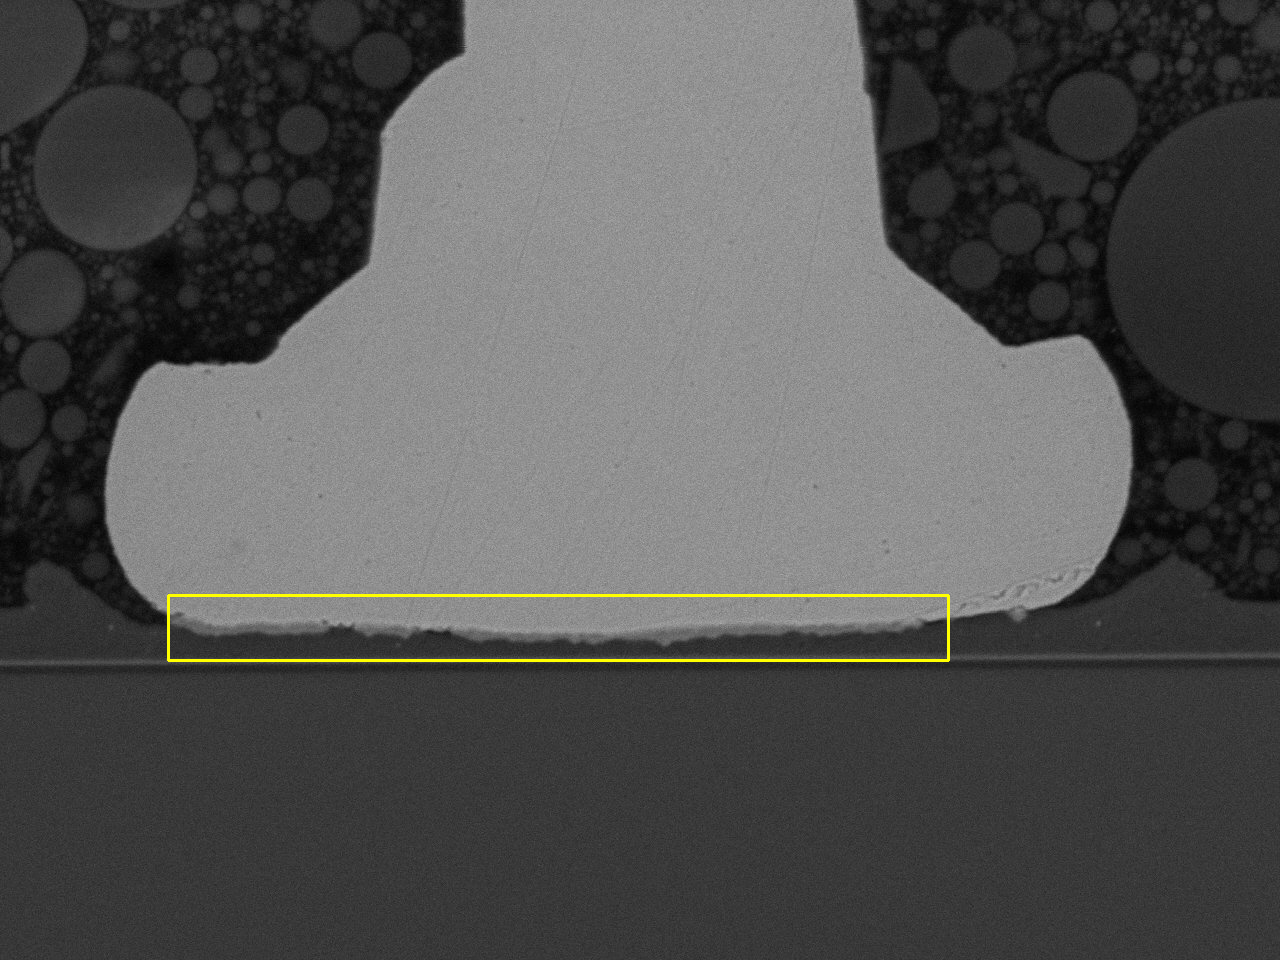

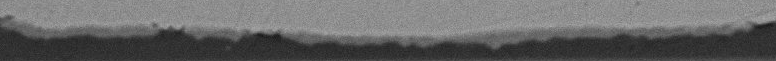

In [ ]:
#Trovato il punto migliore, costruisco un rettangolo delle stesse dimensioni dell'immagine "needle" che mi identifichi la zona rilevata dall'algoritmo

w = needle.shape[1]
h = needle.shape[0]
cv2.rectangle(image , Max_loc , (Max_loc[0] + w , Max_loc[1] + h) , (0,255,255) , 2)
cv2_imshow(image)

#Taglio dall'immagine iniziale esattamente questo rettangolo escludendo i bordini esterni, in modo tale da avere l'immagine pulita

x1 = Max_loc[0] + 2
y1 = Max_loc[1] + 2
x2 = Max_loc[0] + w -2
y2 = Max_loc[1] + h - 2
subimage = image[y1:y2, x1:x2]
cv2_imshow(subimage)

133
79


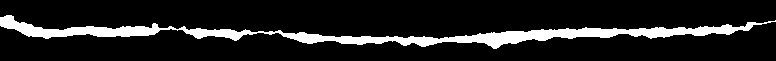

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#Rimuovo il rumore dall'immagine applicando un filtro Gaussiano

blurred_image = cv2.GaussianBlur(subimage, (5, 5), 0)
#cv2_imshow(blurred_image)

#Trasformo l'immagine in una scala di grigi in modo da ridurre le dimensioni della matrice

bw_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
#cv2_imshow(bw_image)
#print(bw_image.shape)
#print(bw_image)

#Per ogni pixel confronto la tonalita' di grigio con due soglie definite(considero il valore minore delle prime 10 righe ed il valore maggiore delle ultime 10) e
#coloro in bianco o in nero l'immagine in modo tale da lasciare unicamente in bianco lo strato intermetallico

minimo = 255
massimo = 0


for i in range(10):
  if np.min(bw_image[i]) < minimo:
    minimo = np.min(bw_image[i])
print(np.min(bw_image[i]))

for j in range(60, 59, -1):
  if np.max(bw_image[j]) > massimo:
    massimo = np.max(bw_image[j])
print(np.max(bw_image[j]))

for i in range(bw_image.shape[0]):
  for j in range(bw_image.shape[1]):
    if bw_image[i][j] >= minimo or bw_image[i][j] <= massimo:
      bw_image[i][j] = 0
    else:
      bw_image[i][j] = 255

cv2_imshow(bw_image)
print(bw_image)

In [ ]:
#Scansionando l'immagine per colonne, segno il numero di pixel colorati in bianco in una lista in modo tale da avere per ogni posizione sulle ordinate
#lo spessore di intermetallo presente nell'immagine e di questo ne misuro il valore medio

intermetallic_depth = []
i = 0
j = 0
numero_intermetallo = 0
y = bw_image.shape[0]
x = bw_image.shape[1]

for i in range(x):
  for j in range(y):
    if bw_image[j][i] == 255:
      numero_intermetallo += 1
  intermetallic_depth.append(numero_intermetallo)
  numero_intermetallo = 0

average_depth = np.mean(intermetallic_depth)

print(intermetallic_depth)
print(len(intermetallic_depth))
print(np.max(intermetallic_depth))
print(average_depth)

[9, 10, 10, 10, 12, 12, 13, 14, 14, 14, 14, 14, 13, 13, 9, 9, 9, 9, 9, 9, 9, 11, 12, 12, 13, 12, 13, 12, 13, 13, 12, 12, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 10, 10, 10, 10, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 9, 10, 11, 11, 10, 10, 11, 11, 11, 11, 10, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 7, 7, 7, 11, 12, 12, 11, 9, 9, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 3, 3, 3, 2, 2, 1, 2, 1, 2, 2, 3, 3, 5, 6, 6, 5, 5, 4, 4, 6, 6, 6, 7, 8, 9, 10, 11, 11, 11, 11, 9, 9, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 7, 8, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 9, 10, 10, 11, 10, 10, 8, 8, 7, 6, 6, 5, 5, 5, 6, 5, 4, 4, 5, 4, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 3, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 6, 6, 8, 8, 10, 10, 10, 11, 11

<StemContainer object of 3 artists>

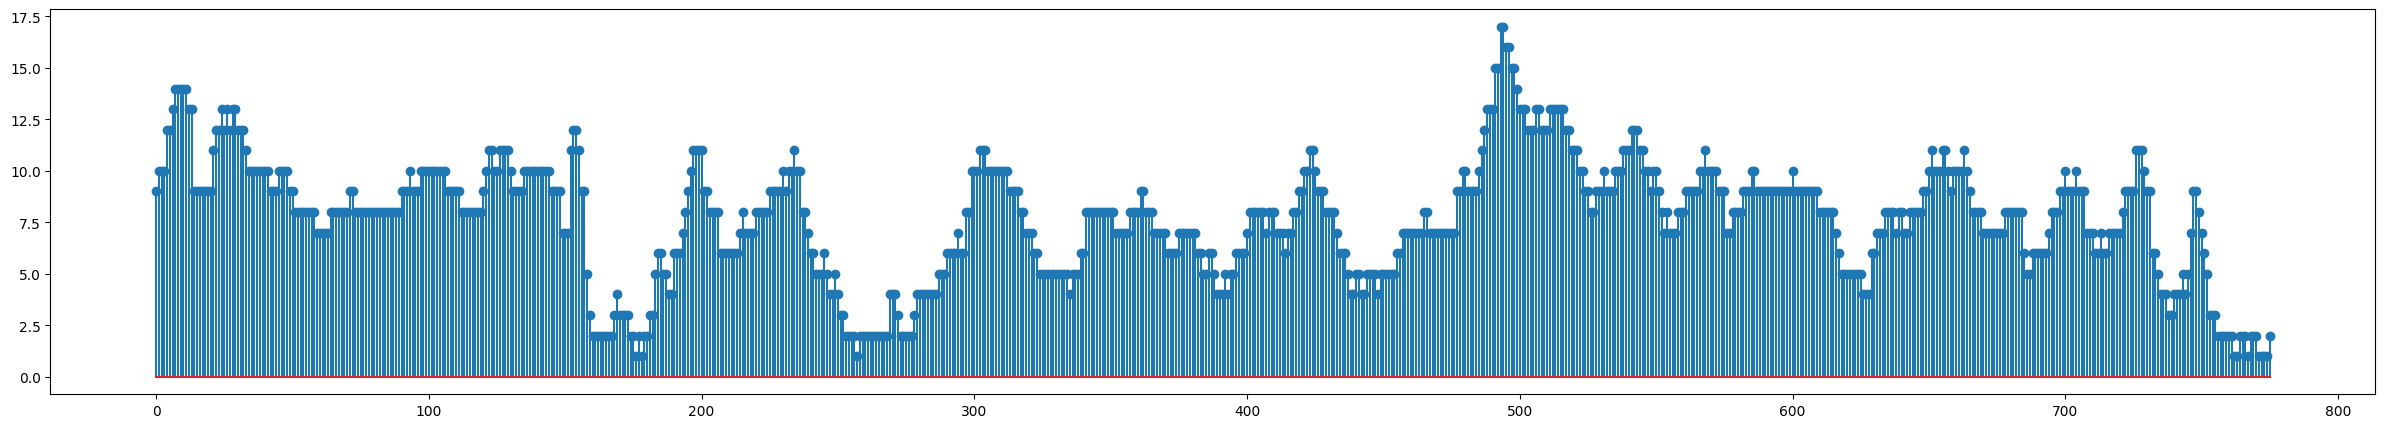

In [ ]:
#Rappresentazione della quantita' di intermetallo al variare dell'ordinata del contatto

plt.figure(figsize=(30, 5))
plt.stem(intermetallic_depth)

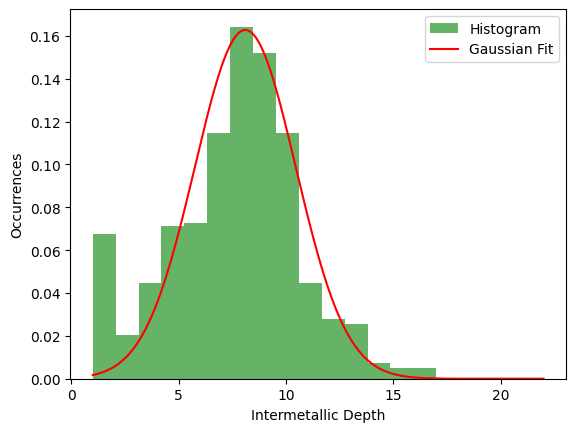

In [ ]:
#Rappresento tutti gli spessori di intermetallo nel contatto sotto forma di istogramma e faccio un fit mediante una distribuzione Gaussiana

from scipy.optimize import curve_fit

intermetallic_depth = np.array(intermetallic_depth)
unique_elements, counts = np.unique(intermetallic_depth, return_counts=True)
mean = np.mean(intermetallic_depth)
sigma = np.std(intermetallic_depth)

# Definisco la funzione Gaussiana
def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

# Genero i valori per l'asse x
x = np.arange(max(intermetallic_depth) + 5)

# Faccio il fit con i dati
popt, pcov = curve_fit(gaussian, unique_elements, counts, maxfev=100000)

# Genero la curva della Gaussiana
x_fit = np.linspace(min(unique_elements), max(unique_elements) + 5, 1000)
y_fit = gaussian(x_fit, *popt)/750

# Plotto l'istogramma con il fit della Gaussiana
plt.hist(intermetallic_depth, bins=15, density=True, alpha=0.6, color='g', label='Histogram')
plt.plot(x_fit, y_fit, 'r-', label='Gaussian Fit')
plt.xlabel('Intermetallic Depth')
plt.ylabel('Occurrences')
plt.legend()
plt.show()

In [ ]:
#Considerando la distribuzione Gaussiana, definisco degli spessori limite che mi escludano le code della distribuzione in modo tale da poter
#calcolare lo spessore medio in maniera piu' precisa

percentile = round(stats.norm.ppf(percentuale / 100, loc=mean, scale=sigma), 2)
x1 = round(percentile, 2)
x2 = round(2 * mean - percentile, 2)
smoothed = []

for el in intermetallic_depth:
  if el >= x1 and el <= x2:
    smoothed.append(el)

print(smoothed)
print(len(smoothed))
print(np.mean(smoothed))

[9, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 10, 10, 10, 10, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 9, 10, 10, 10, 10, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 7, 7, 7, 9, 9, 5, 5, 6, 6, 5, 5, 6, 6, 6, 7, 8, 9, 10, 9, 9, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 7, 8, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 9, 10, 10, 10, 10, 8, 8, 7, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 6, 6, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 8, 8, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 7, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 7, 7, 7, 6, 7, 7, 8, 8, 9, 9, 10, 10, 10, 

# Valutazione unita' di lunghezza per pixel

In [ ]:
#Prendo la seconda parte dell'immagine iniziale e la trasformo in una scala di grigi, per ogni riga calcolo il numero di pixel neri e ne identifico
#il numero massimo in modo tale da avere un riferimento rispetto alla scala fornita dall'immagine

lenght_image_bw = cv2.cvtColor(lenght_image, cv2.COLOR_BGR2GRAY)
black_count = []

for i in range(lenght_image_bw.shape[0]):
  black_count.append(np.sum(lenght_image_bw[i] == 0))

max_black = np.max(black_count)
lunghezza_pixel = lunghezza_riferimento / max_black

#Stamo in definitiva i valori di profondita' media e massima come lunghezza fisica

profondita_media_grezza = round(np.mean(intermetallic_depth) * lunghezza_pixel, 2)
profondita_media = round(np.mean(smoothed) * lunghezza_pixel, 2)
profondita_massima = round(np.max(intermetallic_depth) * lunghezza_pixel, 2)

print(f'La profondità media prima dello smoothing é {profondita_media_grezza} nm')
print(f'La profondità media dopo lo smoothing é {profondita_media} nm')
print(f'La profondità massima é {profondita_massima} nm')

La profondità media prima dello smoothing é 450.83 nm
La profondità media dopo lo smoothing é 461.85 nm
La profondità massima é 998.04 nm
